In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

C:\Users\ileci\AppData\Local\Temp\ipykernel_27520\1801383384.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('./data/features_30_sec.csv')
compression_df = pd.read_csv('./data/compression_feature.csv')

# Merge the two DataFrames based on the 'filename' column
merged_df = pd.merge(df, compression_df, on='filename')
merged_df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [4]:
# Define a list of unique genres
unique_genres = merged_df['label'].unique()

# Initialize lists to store train and validation data
train_data = []
validation_data = []

# Split the data for each genre
for genre in unique_genres:
    # Filter the DataFrame for the current genre
    genre_data = merged_df[merged_df['label'] == genre]
    
    # Split the data into training and validation sets
    train_genre, val_genre = train_test_split(genre_data, test_size=20, shuffle=False)
    
    # Append the split data to the respective lists
    train_data.append(train_genre)
    validation_data.append(val_genre)

# Concatenate the lists of DataFrames into single DataFrames
train_data = pd.concat(train_data)
validation_data = pd.concat(validation_data)


In [5]:
train_data

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
974   rock.00075.wav  661794          0.408594         0.090618  0.126935   
975   rock.00076.wav  661794          0.345583         0.093378  0.145840   
976   rock.00077.wav  661794          0.455317         0.077491  0.128746   
977   rock.00078.wav  661794          0.358062         0.091999  0.144420   
978   rock.00079.wav  661794          0.360042         0.083953  0.116724   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.002827             1784.165850          129774.064525   
1    0.002373             1530.176679          375850.073649   
2    0.002746             1552.811865          156467.643368   
3    0.006346             1070.106615          184355.942417   
4    0.002303             1835.004266          343399.939274   
..        ...                     ...                    ...   
974  0.001782             2301.799132          411284.904924   
975  0.002309             1659.579361          508721.777686   
976  0.001910             2187.977477          238379.073523   
977  0.002087             1878.549952          521514.431753   
978  0.000789             2148.410463          253618.158995   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc17_mean  \
0                2002.449060            85882.761315  ...    -1.690215   
1                2039.036516           213843.755497  ...    -0.731125   
2                1747.702312            76254.192257  ...    -7.729093   
3                1596.412872           166441.494769  ...    -3.319597   
4                1748.172116            88445.209036  ...    -5.454034   
..                       ...                     ...  ...          ...   
974              2355.239840            76150.310955  ...    -8.456369   
975              1953.259408           113790.222194  ...    -8.116253   
976              2350.874065            86250.326009  ...    -6.241045   
977              2204.936033           137103.364367  ...   -12.770678   
978              2107.165355            72155.551685  ...   -13.479134   

     mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0     36.524071    -0.408979   41.597103    -2.303523   55.062923   
1     60.314529     0.295073   48.120598    -0.283518   51.106190   
2     47.639427    -1.816407   52.382141    -3.439720   46.639660   
3     50.206673     0.636965   37.319130    -0.619121   37.259739   
4     75.269707    -0.916874   53.613918    -4.404827   62.910812   
..          ...          ...         ...          ...         ...   
974   52.968510     0.388519   57.249142    -9.238386   68.606178   
975   55.894871    -0.675326   47.441017    -7.607761   46.765530   
976   47.203609    -1.461478   57.166630    -8.244150   39.823624   
977   34.306484    -4.898369   52.004292    -2.520796   68.188065   
978   50.848667     3.308529   47.726006    -3.704957   56.781952   

     mfcc20_mean  mfcc20_var  label  compression_reduction  
0       1.221291   46.936035  blues               0.293226  
1       0.531217   45.786282  blues               0.378123  
2      -2.231258   30.573025  blues               0.288798  
3      -3.407448   31.949339  blues               0.404006  
4     -11.703234   55.195160  blues               0.349760  
..           ...         ...    ...                    ...  
974    -0.288135   78.638748   rock               0.267256  
975    -0.208633   75.962044   rock               0.308650  
976    -3.277006   31.328596   rock               0

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Extract features and labels
X_train = train_data.drop(columns=['label', 'filename'])  # Assuming 'label' and 'filename' are not features
y_train = train_data['label']
X_val = validation_data.drop(columns=['label', 'filename'])
y_val = validation_data['label']
# Define hyperparameter distributions for each model
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(5, 21)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

knn_param_dist = {
    'n_neighbors': randint(3, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

svm_param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

lgbm_param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.05, 0.15),
    'max_depth': [-1] + list(range(5, 21)),
    'num_leaves': randint(20, 150)
}

# Perform randomized search for each model
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), rf_param_dist, n_iter=20, cv=4)

knn_random_search = RandomizedSearchCV(KNeighborsClassifier(), knn_param_dist, n_iter=20, cv=4)

svm_random_search = RandomizedSearchCV(SVC(), svm_param_dist, n_iter=20, cv=4)

lgbm_random_search = RandomizedSearchCV(LGBMClassifier(), lgbm_param_dist, n_iter=20, cv=4)

# Fit randomized search models
rf_random_search.fit(X_train, y_train)
print('fit rf')
knn_random_search.fit(X_train, y_train)
print('fit knn')
#svm_random_search.fit(X_train, y_train)
print('fit svm')
lgbm_random_search.fit(X_train, y_train)
print('fit lgbm')

# Get best hyperparameters for each model
rf_best_params = rf_random_search.best_params_
knn_best_params = knn_random_search.best_params_
#svm_best_params = svm_random_search.best_params_
lgbm_best_params = lgbm_random_search.best_params_

print("Random Forest Best Parameters:", rf_best_params)
print("KNN Best Parameters:", knn_best_params)
#print("SVM Best Parameters:", svm_best_params)
print("Light GBM Best Parameters:", lgbm_best_params)

# Use best parameters to create tuned models
tuned_rf_model = RandomForestClassifier(**rf_best_params)
tuned_knn_model = KNeighborsClassifier(**knn_best_params)
#tuned_svm_model = SVC(**svm_best_params)
tuned_lgbm_model = LGBMClassifier(**lgbm_best_params)

# Train tuned models
tuned_rf_model.fit(X_train, y_train)
tuned_knn_model.fit(X_train, y_train)
#tuned_svm_model.fit(X_train, y_train)
tuned_lgbm_model.fit(X_train, y_train)

# Evaluate tuned models on validation set
tuned_rf_val_predictions = tuned_rf_model.predict(X_val)
tuned_knn_val_predictions = tuned_knn_model.predict(X_val)
#tuned_svm_val_predictions = tuned_svm_model.predict(X_val)
tuned_lgbm_val_predictions = tuned_lgbm_model.predict(X_val)

# Calculate accuracy scores for tuned models
tuned_rf_accuracy = accuracy_score(y_val, tuned_rf_val_predictions)
tuned_knn_accuracy = accuracy_score(y_val, tuned_knn_val_predictions)
#tuned_svm_accuracy = accuracy_score(y_val, tuned_svm_val_predictions)
tuned_lgbm_accuracy = accuracy_score(y_val, tuned_lgbm_val_predictions)

print("\nTuned Random Forest Accuracy:", tuned_rf_accuracy)
print("Tuned KNN Accuracy:", tuned_knn_accuracy)
#print("Tuned SVM Accuracy:", tuned_svm_accuracy)
print("Tuned Light GBM Accuracy:", tuned_lgbm_accuracy)

# Create confusion matrix for each tuned model
tuned_rf_conf_matrix = confusion_matrix(y_val, tuned_rf_val_predictions)
tuned_knn_conf_matrix = confusion_matrix(y_val, tuned_knn_val_predictions)
#tuned_svm_conf_matrix = confusion_matrix(y_val, tuned_svm_val_predictions)
tuned_lgbm_conf_matrix = confusion_matrix(y_val, tuned_lgbm_val_predictions)

# Print confusion matrices for tuned models
print("\nTuned Random Forest Confusion Matrix:\n", tuned_rf_conf_matrix)
print("\nTuned KNN Confusion Matrix:\n", tuned_knn_conf_matrix)
#print("\nTuned SVM Confusion Matrix:\n", tuned_svm_conf_matrix)
print("\nTuned Light GBM Confusion Matrix:\n", tuned_lgbm_conf_matrix)


fit rf
fit knn
fit svm
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11443
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 59
[LightGBM] [Info] Start training from score -2.300917
[LightGBM] [Info] Start training from score -2.300917
[LightGBM] [Info] Start training from score -2.300917
[LightGBM] [Info] Start training from score -2.300917
[LightGBM] [Info] Start training from score -2.300917
[LightGBM] [Info] Start training from score -2.317724
[LightGBM] [Info] Start training from score -2.300917
[LightGBM] [Info] Start training from score -2.300917
[LightGBM] [Info] Start training from score -2.300917
[LightGBM] [Info] Start training from score -2.300917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [8]:
## Kaggle stuff
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('./Data/features_30_sec.csv')
data

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075268  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.002827             1784.165850          129774.064525   
1    0.002373             1530.176679          375850.073649   
2    0.002746             1552.811865          156467.643368   
3    0.006346             1070.106615          184355.942417   
4    0.002303             1835.004266          343399.939274   
..        ...                     ...                    ...   
995  0.000345             2008.149458          282174.689224   
996  0.000588             2006.843354          182114.709510   
997  0.000322             2077.526598          231657.968040   
998  0.001211             1398.699344          240318.731073   
999  0.000336             1609.795082          422203.216152   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                2002.449060            85882.761315  ...   52.420910   
1                2039.036516           213843.755497  ...   55.356403   
2                1747.702312            76254.192257  ...   40.598766   
3                1596.412872           166441.494769  ...   44.427753   
4                1748.172116            88445.209036  ...   86.099236   
..                       ...                     ...  ...         ...   
995              2106.541053            88609.749506  ...   45.050526   
996              2068.942009            82426.016726  ...   33.851742   
997              1927.293153            74717.124394  ...   33.597008   
998              1818.450280           109090.207161  ...   46.324894   
999              1797.213044           120115.632927  ...   59.167755   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0      -1.690215   36.524071    -0.408979   41.597103    -2.303523   
1      -0.731125   60.314529     0.295073   48.120598    -0.283518   
2      -7.729093   47.639427    -1.816407   52.382141    -3.439720   
3      -3.319597   50.206673     0.636965   37.319130    -0.619121   
4      -5.454034   75.269707    -0.916874   53.613918    -4.404827   
..           ...         ...          ...         ...          ...   
995   -13.289984   41.754955     2.484145   36.778877    -6.713265   
996   -10.848309   39.395096     1.881229   32.010040    -7.461491   
997   -12.845291   36.367264     3.440978   36.001110   -12.588070   
998    -4.416050   43.583942     1.556207   34.331261    -5.041897   
999    -7.069775   73.760391     0.028346   76.504326    -2.025783   

     mfcc19_var  mfcc20_mean  mfcc20_var  label  
0     55.062923     1.221291   46.936035  blues  
1     51.106190     0.531217   45.786282  blues  
2     46.639660    -2.231258   30.573025  blues  
3     37.259739    -3.407448   31.949339  blues  
4     62.910812   -11.703234   55.195160  blues  
..          ...          ...         ...    ...  
995   54.866825    -1.193787   49.950665   rock  
996   39.196327    -2.795338   31.773624   rock  
997   42.502201    -2.106337   29.865515   rock  
998   47.227180    -3.590644   41.299088   rock  
999   72.189316     1.155239   49.662510   rock  


In [10]:

compression_df = pd.read_csv('./data/compression_feature.csv')

# Merge the two DataFrames based on the 'filename' column
merged_df = pd.merge(data, compression_df, on='filename')
merged_df

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
994   rock.00095.wav  661794          0.352063         0.080487  0.079486   
995   rock.00096.wav  661794          0.398687         0.075086  0.076458   
996   rock.00097.wav  661794          0.432142         0.075268  0.081651   
997   rock.00098.wav  661794          0.362485         0.091506  0.083860   
998   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.002827             1784.165850          129774.064525   
1    0.002373             1530.176679          375850.073649   
2    0.002746             1552.811865          156467.643368   
3    0.006346             1070.106615          184355.942417   
4    0.002303             1835.004266          343399.939274   
..        ...                     ...                    ...   
994  0.000345             2008.149458          282174.689224   
995  0.000588             2006.843354          182114.709510   
996  0.000322             2077.526598          231657.968040   
997  0.001211             1398.699344          240318.731073   
998  0.000336             1609.795082          422203.216152   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc17_mean  \
0                2002.449060            85882.761315  ...    -1.690215   
1                2039.036516           213843.755497  ...    -0.731125   
2                1747.702312            76254.192257  ...    -7.729093   
3                1596.412872           166441.494769  ...    -3.319597   
4                1748.172116            88445.209036  ...    -5.454034   
..                       ...                     ...  ...          ...   
994              2106.541053            88609.749506  ...   -13.289984   
995              2068.942009            82426.016726  ...   -10.848309   
996              1927.293153            74717.124394  ...   -12.845291   
997              1818.450280           109090.207161  ...    -4.416050   
998              1797.213044           120115.632927  ...    -7.069775   

     mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0     36.524071    -0.408979   41.597103    -2.303523   55.062923   
1     60.314529     0.295073   48.120598    -0.283518   51.106190   
2     47.639427    -1.816407   52.382141    -3.439720   46.639660   
3     50.206673     0.636965   37.319130    -0.619121   37.259739   
4     75.269707    -0.916874   53.613918    -4.404827   62.910812   
..          ...          ...         ...          ...         ...   
994   41.754955     2.484145   36.778877    -6.713265   54.866825   
995   39.395096     1.881229   32.010040    -7.461491   39.196327   
996   36.367264     3.440978   36.001110   -12.588070   42.502201   
997   43.583942     1.556207   34.331261    -5.041897   47.227180   
998   73.760391     0.028346   76.504326    -2.025783   72.189316   

     mfcc20_mean  mfcc20_var  label  compression_reduction  
0       1.221291   46.936035  blues               0.293226  
1       0.531217   45.786282  blues               0.378123  
2      -2.231258   30.573025  blues               0.288798  
3      -3.407448   31.949339  blues               0.404006  
4     -11.703234   55.195160  blues               0.349760  
..           ...         ...    ...                    ...  
994    -1.193787   49.950665   rock               0.315774  
995    -2.795338   31.773624   rock               0.313357  
996    -2.106337   29.865515   rock               0

In [11]:
# Define a list of unique genres
unique_genres = merged_df['label'].unique()

# Initialize lists to store train and validation data
train_data = []
validation_data = []

# Split the data for each genre
for genre in unique_genres:
    # Filter the DataFrame for the current genre
    genre_data = merged_df[merged_df['label'] == genre]
    
    # Split the data into training and validation sets
    train_genre, val_genre = train_test_split(genre_data, test_size=20, shuffle=False)
    
    # Append the split data to the respective lists
    train_data.append(train_genre)
    validation_data.append(val_genre)

# Concatenate the lists of DataFrames into single DataFrames
train_data = pd.concat(train_data)
validation_data = pd.concat(validation_data)

In [12]:
df = train_data.iloc[0:, 2:]
y = df.label.values
X = df.drop('label', axis = 1)
X_columns = X.columns
scale = MinMaxScaler()
scaled_data = scale.fit_transform(X)
X = pd.DataFrame(scaled_data, columns = X_columns).values

In [65]:
df = validation_data.iloc[0:, 2:]
val_y = df.label.values
val_X = df.drop('label', axis = 1)
val_filename = validation_data['filename']
X_columns = val_X.columns
scale = MinMaxScaler()
scaled_data = scale.fit_transform(val_X)
val_X = pd.DataFrame(scaled_data, columns = X_columns).values

In [66]:
pd.DataFrame(validation_data['filename'])

filename
0    blues.00080.wav
1    blues.00081.wav
2    blues.00082.wav
3    blues.00083.wav
4    blues.00084.wav
..               ...
195   rock.00095.wav
196   rock.00096.wav
197   rock.00097.wav
198   rock.00098.wav
199   rock.00099.wav

[200 rows x 1 columns]

In [16]:
def model_build(model, kf, title = "Default"):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    print("Accuracy score of", title, "is:", round(np.mean(accuracy_scores), 2))

    model.fit(X,y)
    y_preds = model.predict(val_X)
    accuracy = accuracy_score(val_y, y_preds)
    print("Accuracy score of last 20 is:", round(accuracy, 2))
    val_df = pd.DataFrame({'filename': val_filename, 'Prediction': y_preds})
    print(val_df.head())
    # Let's see the confusion matrix of the last split for a little insight
    con_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (16, 9))
    sns.heatmap(con_mat, cmap="Blues", annot=True, 
                xticklabels = ["blues", "classical", "country", "disco", 
                               "hiphop", "jazz", "metal", "pop", "reggae", "rock"], 
                yticklabels=["blues", "classical", "country", "disco", "hiphop", 
                             "jazz", "metal", "pop", "reggae", "rock"])
    plt.show()
    return(val_df)

In [17]:
split = KFold(n_splits=5, shuffle=True)

Accuracy score of Random Forest Classifier is: 0.71
Accuracy score of last 20 is: 0.41
           filename Prediction
80  blues.00080.wav     hiphop
81  blues.00081.wav      blues
82  blues.00082.wav      blues
83  blues.00083.wav      blues
84  blues.00084.wav      blues


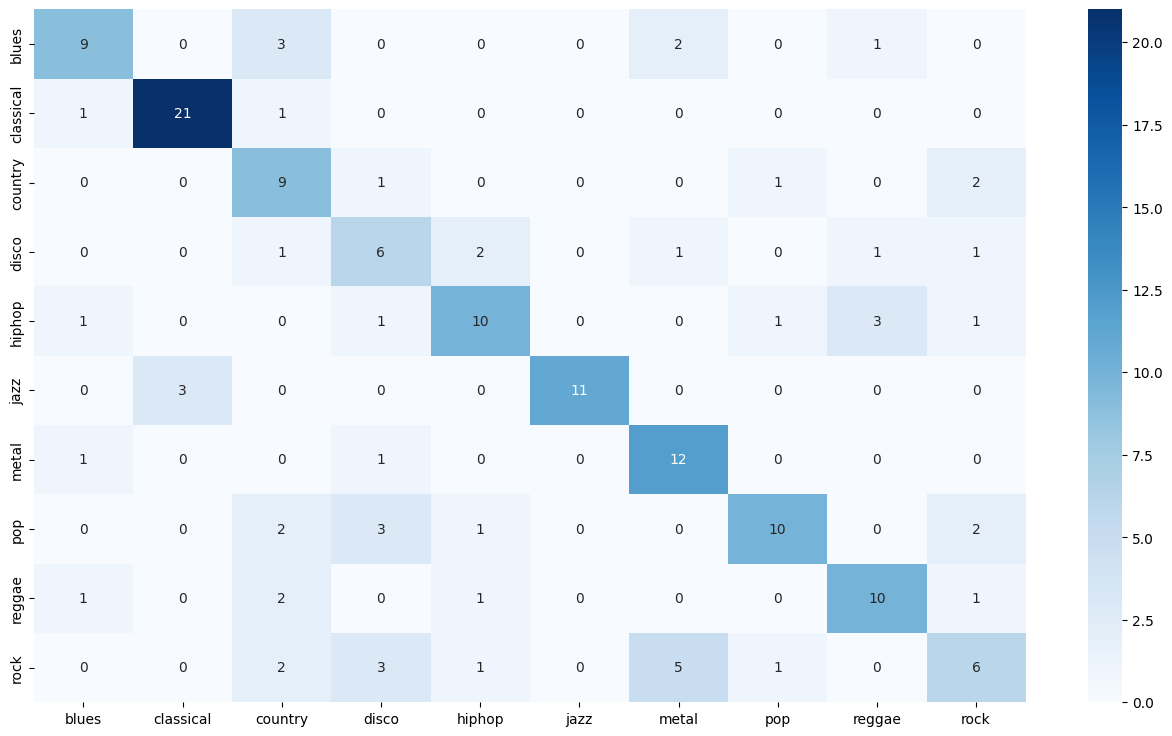

filename Prediction
80   blues.00080.wav     hiphop
81   blues.00081.wav      blues
82   blues.00082.wav      blues
83   blues.00083.wav      blues
84   blues.00084.wav      blues
..               ...        ...
994   rock.00095.wav      blues
995   rock.00096.wav       rock
996   rock.00097.wav       rock
997   rock.00098.wav      blues
998   rock.00099.wav       jazz

[200 rows x 2 columns]

In [18]:
# Random Forest Classifer

rfc = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=10)
model_build(rfc, split, 'Random Forest Classifier')

Accuracy score of K Nearest Neighbor is: 0.67
Accuracy score of last 20 is: 0.41
           filename Prediction
80  blues.00080.wav       rock
81  blues.00081.wav      disco
82  blues.00082.wav      blues
83  blues.00083.wav      metal
84  blues.00084.wav      blues


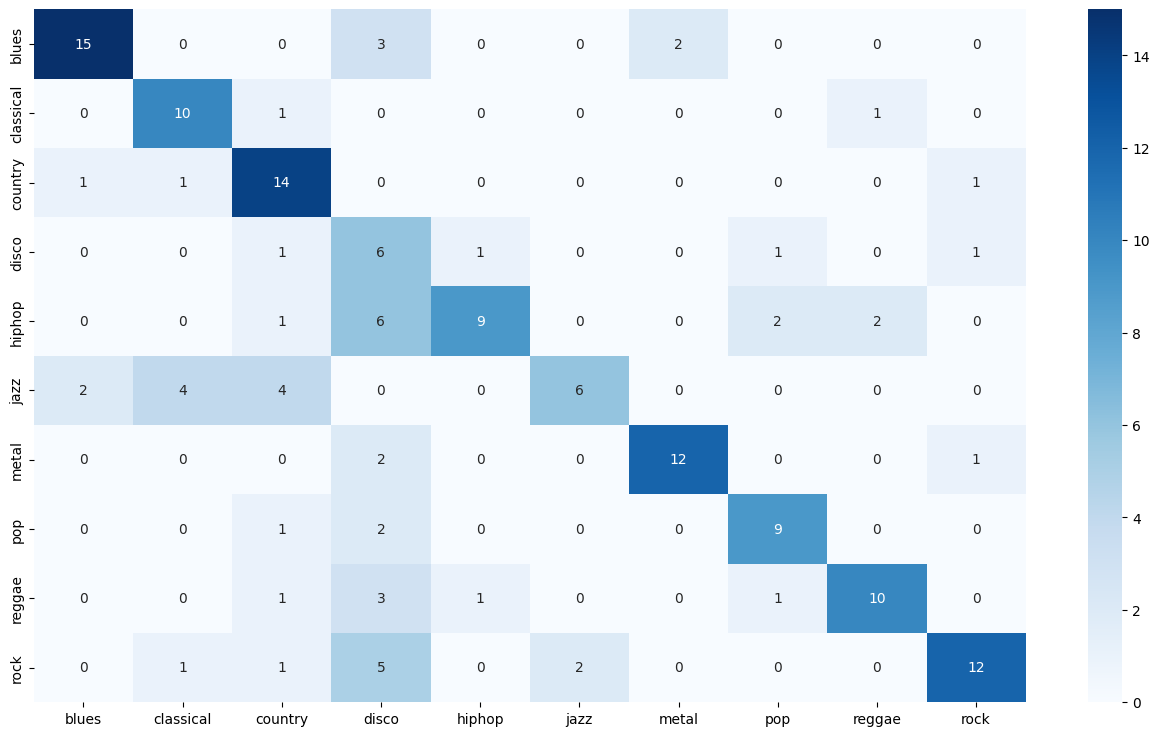

filename Prediction
80   blues.00080.wav       rock
81   blues.00081.wav      disco
82   blues.00082.wav      blues
83   blues.00083.wav      metal
84   blues.00084.wav      blues
..               ...        ...
994   rock.00095.wav       rock
995   rock.00096.wav       rock
996   rock.00097.wav      metal
997   rock.00098.wav    country
998   rock.00099.wav     reggae

[200 rows x 2 columns]

In [19]:
# K Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors=10)
model_build(knn, split, 'K Nearest Neighbor')

Accuracy score of Support Vector Machine is: 0.69
Accuracy score of last 20 is: 0.43
           filename Prediction
80  blues.00080.wav      blues
81  blues.00081.wav      blues
82  blues.00082.wav      blues
83  blues.00083.wav      blues
84  blues.00084.wav      blues


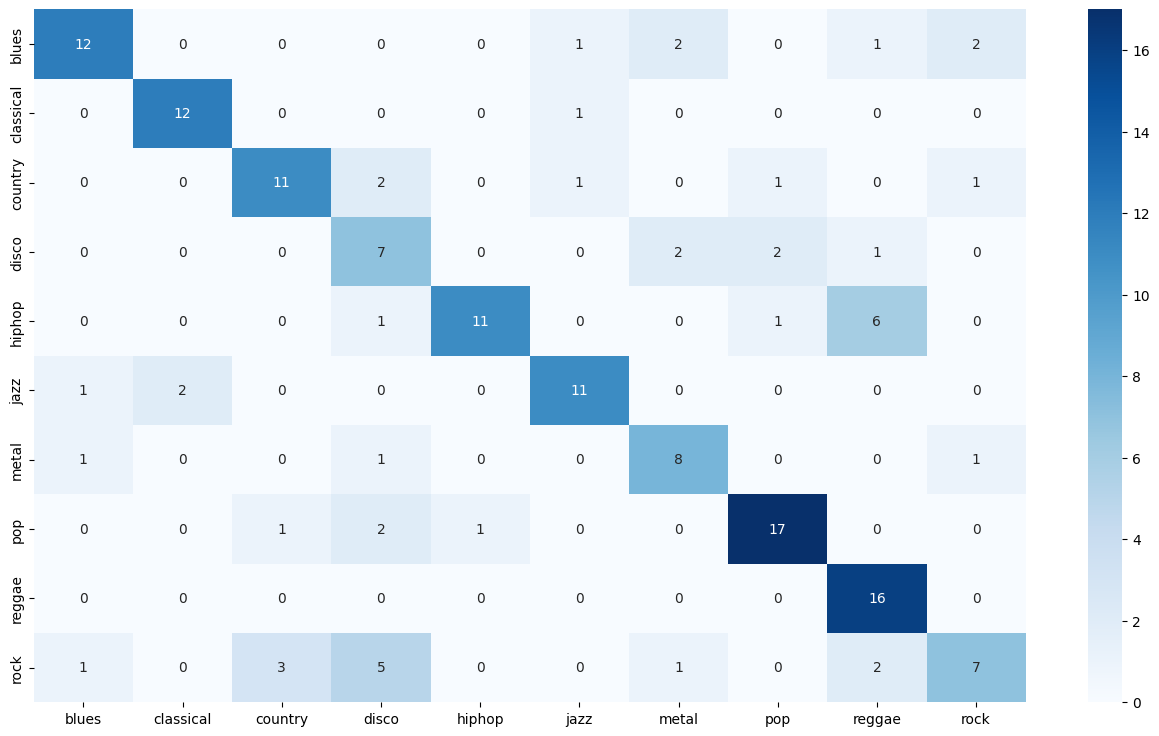

filename Prediction
80   blues.00080.wav      blues
81   blues.00081.wav      blues
82   blues.00082.wav      blues
83   blues.00083.wav      blues
84   blues.00084.wav      blues
..               ...        ...
994   rock.00095.wav      blues
995   rock.00096.wav       rock
996   rock.00097.wav      metal
997   rock.00098.wav      blues
998   rock.00099.wav      blues

[200 rows x 2 columns]

In [20]:
# Support Vector Machine

svm = SVC(decision_function_shape="ovo")
model_build(svm, split, 'Support Vector Machine')

In [51]:
val_filename

80     blues.00080.wav
81     blues.00081.wav
82     blues.00082.wav
83     blues.00083.wav
84     blues.00084.wav
            ...       
994     rock.00095.wav
995     rock.00096.wav
996     rock.00097.wav
997     rock.00098.wav
998     rock.00099.wav
Name: filename, Length: 200, dtype: object

Accuracy score of XG Boost is: 0.72
            filename         0         1         2         3         4  \
0    blues.00080.wav  0.960364  0.003323  0.002151  0.004660  0.013248   
1    blues.00081.wav  0.822506  0.004332  0.002101  0.063718  0.027127   
2    blues.00082.wav  0.945558  0.003364  0.002220  0.015130  0.017438   
3    blues.00083.wav  0.733372  0.014034  0.003058  0.016049  0.035113   
4    blues.00084.wav  0.695624  0.006749  0.004455  0.124233  0.108468   
..               ...       ...       ...       ...       ...       ...   
195   rock.00095.wav  0.567478  0.006304  0.007252  0.007731  0.002921   
196   rock.00096.wav  0.268080  0.012469  0.003168  0.002198  0.001652   
197   rock.00097.wav  0.365994  0.004494  0.001745  0.005935  0.002990   
198   rock.00098.wav  0.624376  0.009013  0.006296  0.000586  0.037445   
199   rock.00099.wav  0.041984  0.166877  0.014314  0.110597  0.060756   

            5         6         7         8         9  
0    0.000809  0.00

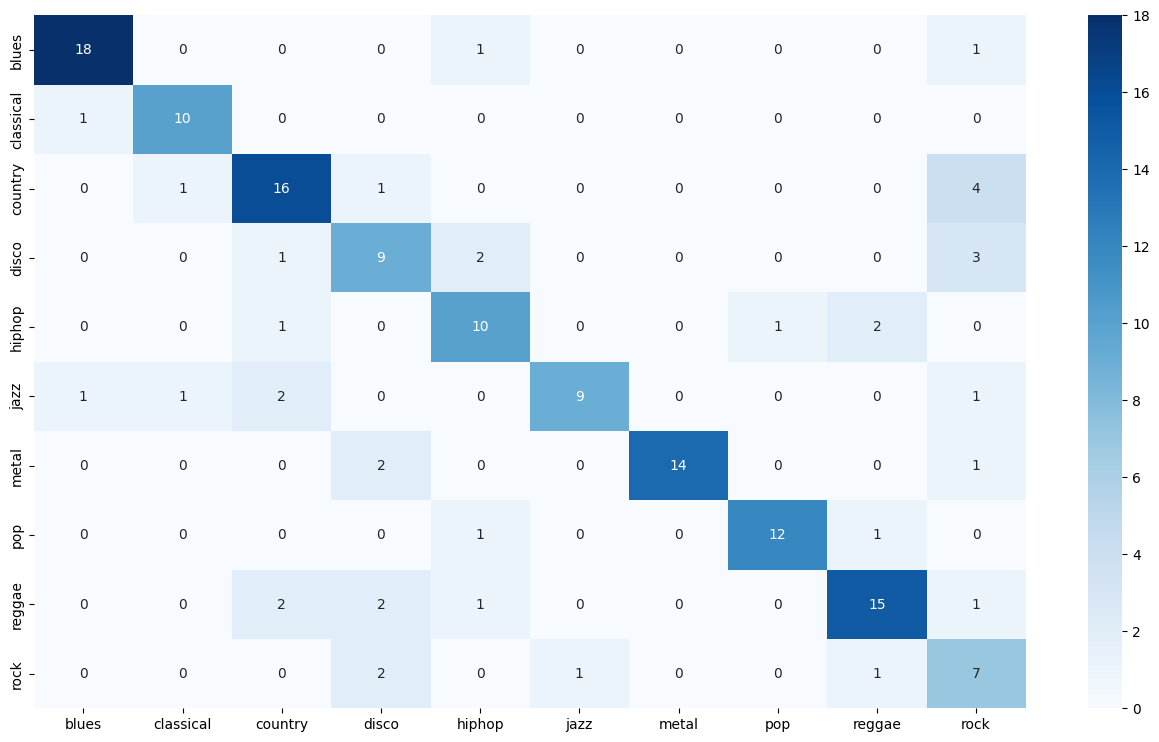

In [67]:
from sklearn.preprocessing import LabelEncoder

def model_build_xgb(model, kf, title="Default"):
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        y_pred_labels = label_encoder.inverse_transform(y_pred)

    print("Accuracy score of", title, "is:", round(np.mean(accuracy_scores), 2))


    model.fit(X, y_encoded)
    y_preds_proba = model.predict_proba(val_X)
    

    df = pd.concat([val_filename, pd.DataFrame(y_preds_proba)], axis=1)
    #df['filename'] = val_filename
    
    # Get the list of column names
    #columns = df.columns.tolist()
    # Reorder the column names, making the last column the first
    #new_columns = [columns[-1]] + columns[:-1]
    # Reindex the DataFrame with the new column order
    #df = df[new_columns]
    print(df)
    

    # Convert probabilities to labels
    y_preds_labels = label_encoder.inverse_transform(np.argmax(y_preds_proba, axis=1))
    
    
    # Let's see the confusion matrix of the last split for a little insight
    con_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(16, 9))
    sns.heatmap(con_mat, cmap="Blues", annot=True,
                xticklabels=["blues", "classical", "country", "disco",
                             "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
                yticklabels=["blues", "classical", "country", "disco", "hiphop",
                             "jazz", "metal", "pop", "reggae", "rock"])
    plt.show()
    return df

# Leave 2 blank spaces after a function definition
xgb = XGBClassifier()
preds = model_build_xgb(xgb, split, 'XG Boost')


In [63]:
print(preds.to_string())

                filename         0         1         2         3         4         5         6         7         8         9
80       blues.00080.wav  0.005069  0.002391  0.012290  0.164868  0.096695  0.001318  0.002035  0.073891  0.628555  0.012889
81       blues.00081.wav  0.016518  0.000945  0.001128  0.010579  0.331119  0.000703  0.001678  0.001409  0.631362  0.004559
82       blues.00082.wav  0.102263  0.006236  0.008117  0.323140  0.065609  0.128556  0.014799  0.005603  0.270858  0.074817
83       blues.00083.wav  0.217476  0.004036  0.003887  0.430237  0.155962  0.004772  0.003625  0.004567  0.149019  0.026417
84       blues.00084.wav  0.009570  0.001508  0.001125  0.023522  0.850290  0.001614  0.004742  0.000698  0.096256  0.010676
85       blues.00085.wav  0.494891  0.006323  0.004038  0.120617  0.200084  0.017109  0.015837  0.005635  0.075920  0.059549
86       blues.00086.wav  0.161199  0.005453  0.004117  0.110164  0.167562  0.015223  0.006863  0.003697  0.509631  0.016092
